## Evaluating and testing the BA algorithm for tuning TSK

In [1]:
from ba_optimization import BeesFitTSK
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import copy

In [2]:
expressions = {"P":"Precipitation", "E":"Potential evapotranspiration", "PB":"Precipation balance", "Tave":"Tave"}
#selected_features = ["Relative_yield_change", "Tave", "Tmax", "Tmin"]
#selected_features = ['Relative_yield_change','yield_of_CT', 'Latitude', 'Longitude',
#       'Years_since_CT_started', 'Crop_rotation_CT', 'Crop_rotation_NT', 'ST',
#       'Soil_cover_in_CT', 'Soil_cover_in_CT', 'Weed_pest_control_CT',
#       'Weed_pest_control_NT', 'P', 'E', 'PB', 'Tave', 'Tmax', 'Tmin']
selected_features = ["Relative_yield_change", 'yield_of_CT', "Tmax", "Tmin"]
train_data = pd.read_csv("dataset/matlab_1_train.csv")[selected_features]
test_data = pd.read_csv("dataset/matlab_1_test.csv")[selected_features]

    

In [3]:
training_model:BeesFitTSK = BeesFitTSK(5, 2, 2, 30, 10, 3, 100, train_data, test_data)
training_model.initialize_population(3, 3, trap_quantile=0.4)

for i in range (3):
    training_model.main_loop()

Current best fitness: 0.2075222193971265 generation 1
Current best fitness: 0.20728672489839764 generation 2


Plotting the optimization development

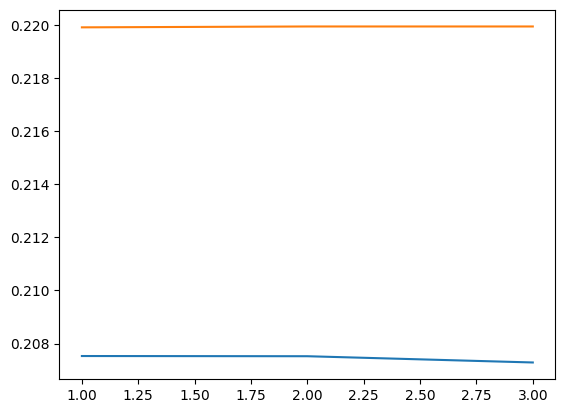

In [4]:
run_n = 1
plt.plot(training_model.training_log[0], training_model.training_log[1], label=f"Run {run_n}")
plt.plot(training_model.training_log[0], training_model.training_log[2], label=f"Run {run_n}")

In [3]:
training_model.all_time_best_model._feature_fuzzy_sets[0].fuzzy_sets[0].get_param_list()

[220.0, 3068.672124352962, 4594.2106103220085, 5831.287654926155]

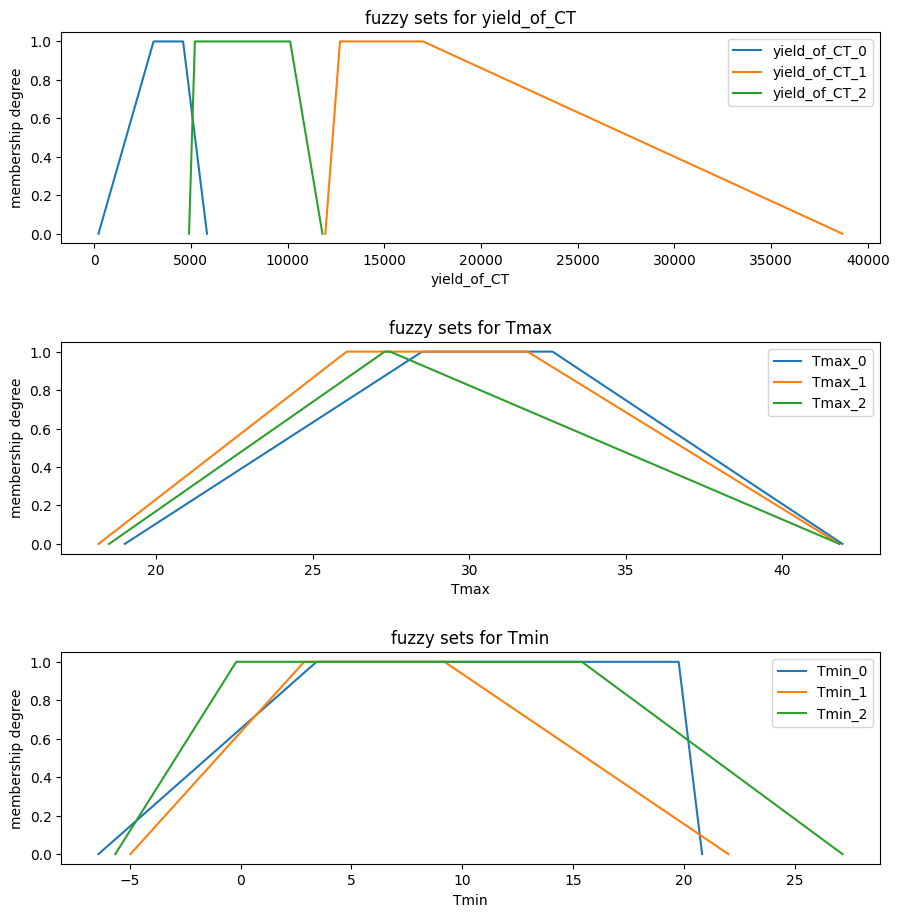

In [4]:
training_model.all_time_best_model.show_fuzzy_sets()

In [ ]:
training_model.all_time_best_model.rulebase.print_rulebase(training_model.all_time_best_model._feature_fuzzy_sets)

IF x0 in yield_of_CT_0 and x1 in Tmax_0 and x2 in Tmin_0 THEN y = x0 * -0.0000 + x1 * 0.0042 + x2 * 0.0028 + -0.1968
IF x0 in yield_of_CT_1 and x1 in Tmax_1 and x2 in Tmin_1 THEN y = x0 * -0.0000 + x1 * 0.0002 + x2 * 0.0035 + -0.0614
IF x0 in yield_of_CT_2 and x1 in Tmax_2 and x2 in Tmin_2 THEN y = x0 * -0.0000 + x1 * 0.0153 + x2 * -0.0072 + -0.3315


In [ ]:
training_model.all_time_best_model.extracted_params

[array([-4.69590365e-07,  4.21652590e-03,  2.78681107e-03, -1.96826219e-01]),
 array([-5.37505463e-06,  2.23185756e-04,  3.47173488e-03, -6.13575842e-02]),
 array([-1.44088001e-05,  1.52725694e-02, -7.24885741e-03, -3.31485928e-01])]

In [ ]:
training_model.all_time_best_model.r2_scores

[0.08469140695818611, 0.061191955578785207, -0.06234856756773999]

In [ ]:
intercepts = [-3.561233e-01, -3.798248e-01, -9.774359e-01]
training_model.all_time_best_model.rulebase.rules[0].consequent.params_list = [4.588443e-02, -1.339733e-02, -1.892194e-02]
training_model.all_time_best_model.rulebase.rules[1].consequent.params_list = [4.569108e-03, 9.736062e-03,-7.339191e-04]
training_model.all_time_best_model.rulebase.rules[2].consequent.params_list = [5.483614e-02, 2.399846e-03, -2.256654e-02]
training_model.all_time_best_model.rulebase.rules[0].consequent.const = intercepts[0]
training_model.all_time_best_model.rulebase.rules[1].consequent.const = intercepts[1]
training_model.all_time_best_model.rulebase.rules[2].consequent.const = intercepts[2]

In [ ]:
training_model.all_time_best_model.rulebase.rules.append(copy.deepcopy(training_model.all_time_best_model.rulebase.rules[0]))
training_model.all_time_best_model.rulebase.rules.append(copy.deepcopy(training_model.all_time_best_model.rulebase.rules[1]))
training_model.all_time_best_model.rulebase.rules.append(copy.deepcopy(training_model.all_time_best_model.rulebase.rules[2]))
print(training_model.all_time_best_model.rulebase.rules)

[<tsk_model.TSKRule object at 0x000002C41EE66100>, <tsk_model.TSKRule object at 0x000002C41EE662E0>, <tsk_model.TSKRule object at 0x000002C41EE66310>, <tsk_model.TSKRule object at 0x000002C42953B610>, <tsk_model.TSKRule object at 0x000002C42953B190>, <tsk_model.TSKRule object at 0x000002C41EDDA580>]


In [ ]:
training_model.all_time_best_model.calculate_rmse()

0.2442465724544399

In [ ]:
training_model.all_time_best_model.rulebase.print_rulebase(training_model.all_time_best_model._feature_fuzzy_sets)

IF x0 in Tave_0 and x1 in Tmax_0 and x2 in Tmin_0 THEN y = x0 * 0.0459 + x1 * -0.0134 + x2 * -0.0189 + -0.3561
IF x0 in Tave_1 and x1 in Tmax_1 and x2 in Tmin_1 THEN y = x0 * 0.0046 + x1 * 0.0097 + x2 * -0.0007 + -0.3798
IF x0 in Tave_2 and x1 in Tmax_2 and x2 in Tmin_2 THEN y = x0 * 0.0548 + x1 * 0.0024 + x2 * -0.0226 + -0.9774
IF x0 in Tave_0 and x1 in Tmax_0 and x2 in Tmin_0 THEN y = x0 * 0.0459 + x1 * -0.0134 + x2 * -0.0189 + -0.3561
IF x0 in Tave_1 and x1 in Tmax_1 and x2 in Tmin_1 THEN y = x0 * 0.0046 + x1 * 0.0097 + x2 * -0.0007 + -0.3798
IF x0 in Tave_2 and x1 in Tmax_2 and x2 in Tmin_2 THEN y = x0 * 0.0548 + x1 * 0.0024 + x2 * -0.0226 + -0.9774


The measured error is not good, indicating that the model underfits and there could be some bug in the code.

In [ ]:
test_series = pd.Series(abs(train_data.iloc[:, 0].to_numpy() - training_model.all_time_best_model.test_actuals))

In [ ]:
test_series

0      0.049601
1      0.045029
2      0.109992
3      0.000117
4      0.084811
         ...   
984    0.073104
985    0.254351
986    0.186092
987    0.091366
988    0.093600
Length: 989, dtype: float64

In [ ]:
training_model.all_time_best_model.test_actuals[605]

0.05924406964962378

In [ ]:
train_data.iloc[605,:]

Relative_yield_change     0.66000
Tave                     24.13333
Tmax                     34.95042
Tmin                     12.99181
Name: 605, dtype: float64

Running more thorough testing

Current best fitness: 0.2075107890487996 generation 1
Current best fitness: 0.20749089480091132 generation 2
Current best fitness: 0.20737157287915614 generation 3
Current best fitness: 0.20715425579846064 generation 4
Current best fitness: 0.20715425579846064 generation 5
Current best fitness: 0.20715425579846064 generation 6
Current best fitness: 0.20704441184264347 generation 7
Current best fitness: 0.20704393866782744 generation 8
Current best fitness: 0.20704393866782744 generation 9
Current best fitness: 0.2070228762285144 generation 10
Current best fitness: 0.20695464771553831 generation 11
Current best fitness: 0.2067649195266118 generation 12
Current best fitness: 0.2067562629041333 generation 13
Current best fitness: 0.20668794638105742 generation 14
Current best fitness: 0.20668774235120832 generation 15
Current best fitness: 0.20668774235120832 generation 16
Current best fitness: 0.20668773128761955 generation 17
Current best fitness: 0.20668773128761955 generation 18
Curre

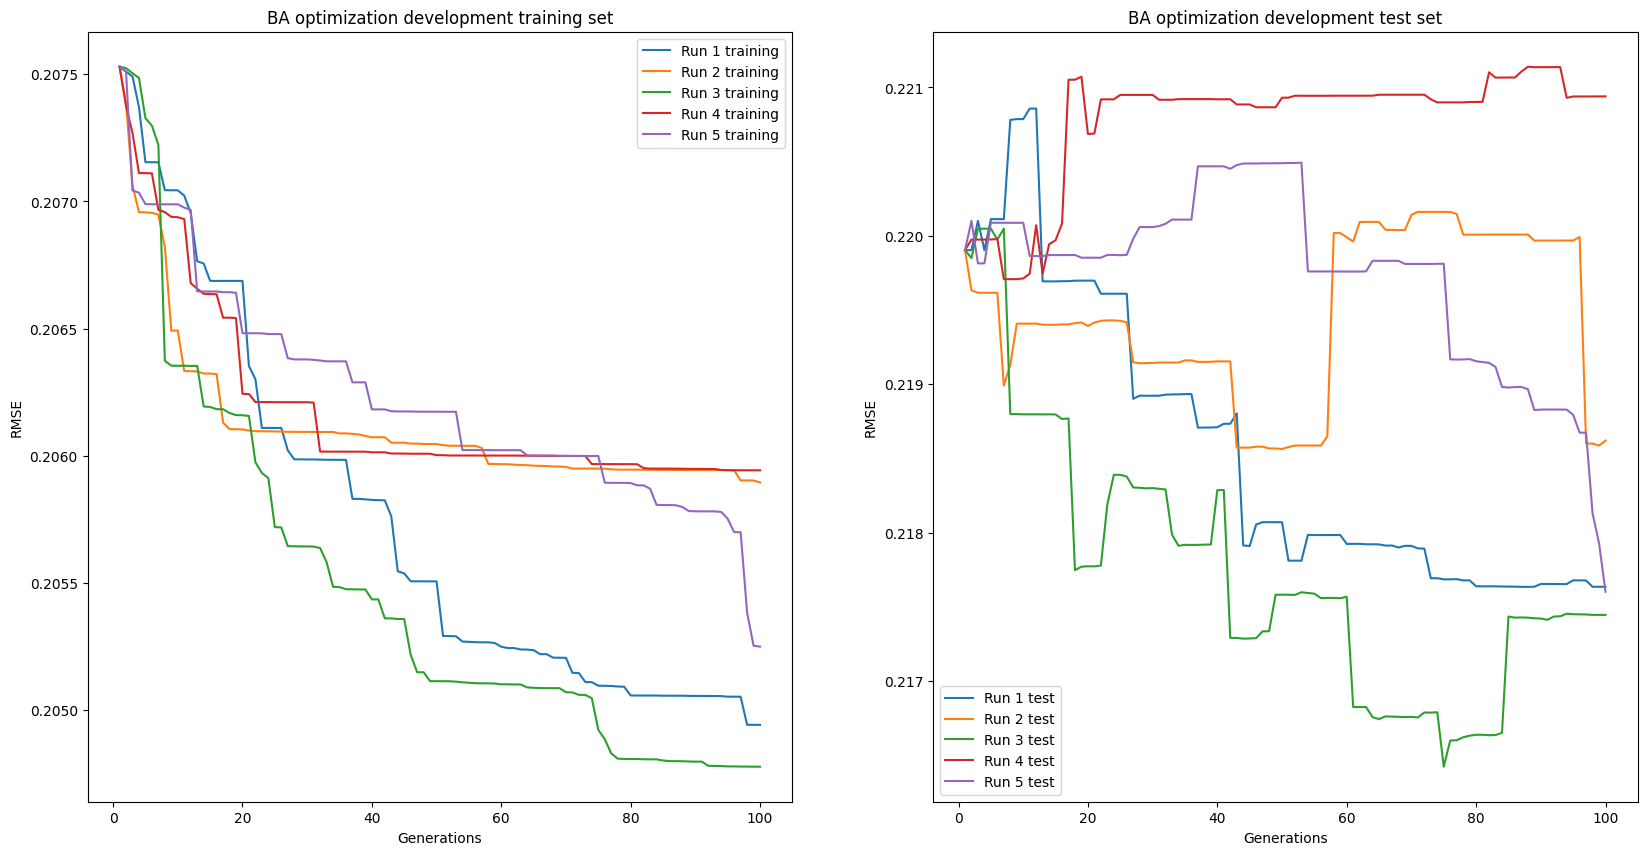

In [18]:
n_runs = 5
import time

time_list = []
log_list = {}
fig, ax = plt.subplots(1,2,figsize=(20, 10))
for run in range(1,n_runs+1):
    start_time = time.time()
    training_model:BeesFitTSK = BeesFitTSK(5, 2, 2, 10, 30, 10, 1000, train_data, test_data)
    training_model.initialize_population(3, 3, trap_quantile=0.4)

    for i in range (100):
        training_model.main_loop()

    print(f"Finish time: {time.time() - start_time:.3f}")
    time_list.append(time.time() - start_time)
    ax[0].plot(training_model.training_log[0], training_model.training_log[1], label=f"Run {run} training")
    ax[1].plot(training_model.training_log[0], training_model.training_log[2], label=f"Run {run} test")
    log_list[(f"Run{run}", "gen")] = training_model.training_log[0]
    log_list[(f"Run{run}", "train")] = training_model.training_log[1]
    log_list[(f"Run{run}", "test")] = training_model.training_log[2]

ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("Generations")
ax[0].set_ylabel("RMSE")
ax[0].set_title(f"BA optimization development training set")
ax[1].set_xlabel("Generations")
ax[1].set_ylabel("RMSE")
ax[1].set_title(f"BA optimization development test set")

print(f"Mean runtime: {np.mean(time_list):.3f} s")
    

In [19]:
pd.DataFrame(log_list).to_csv("BA_log_2.csv")

Trying with a simple aproximation

In [ ]:
def benchmark_funciton(x):
    if x < 10:
        return 5.0
    if x < 20:
        return x*0.5
    if x < 30:
        return 10.0
    if x < 50:
        return 17.44 + x*-0.25
    return 5

In [ ]:
test_x = np.linspace(0, 60, 100)

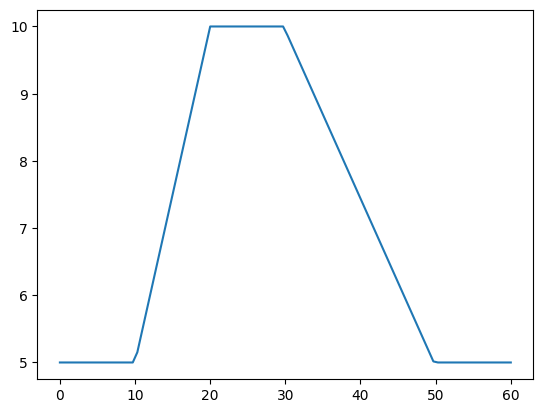

In [ ]:
vec_func = np.vectorize(benchmark_funciton)
cur_y = vec_func(test_x)
plt.plot(test_x, cur_y)

In [ ]:
train_x = np.random.choice(np.linspace(0, 60, 1000), 1000, replace=True)

In [ ]:
train_y = vec_func(train_x)

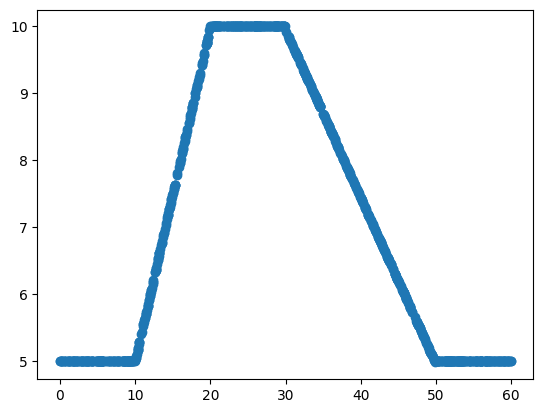

In [ ]:
plt.scatter(train_x, train_y)

In [ ]:
train_df = pd.DataFrame({"X" : train_x, "Y" : train_y})

In [ ]:
training_model2:BeesFitTSK = BeesFitTSK(7, 5, 2, 20, 10, 1, 100, train_df, train_df)
training_model2.initialize_population(4, 4)

for i in range (10):
    training_model2.main_loop()

Current best fitness: 28.90
Current best fitness: 21.09
Current best fitness: 20.82
Current best fitness: 20.80
Current best fitness: 20.70
Current best fitness: 20.49
Current best fitness: 20.33
Current best fitness: 19.81
Current best fitness: 19.81
Current best fitness: 19.80


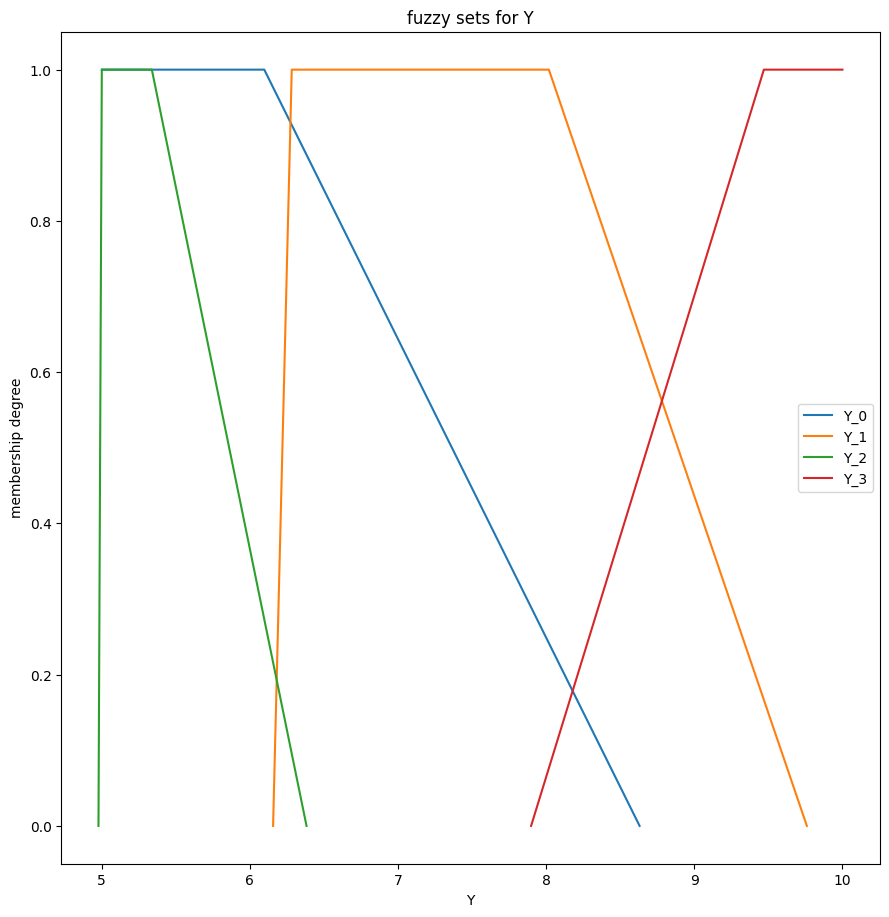

In [ ]:
training_model2.all_time_best_model.show_fuzzy_sets()

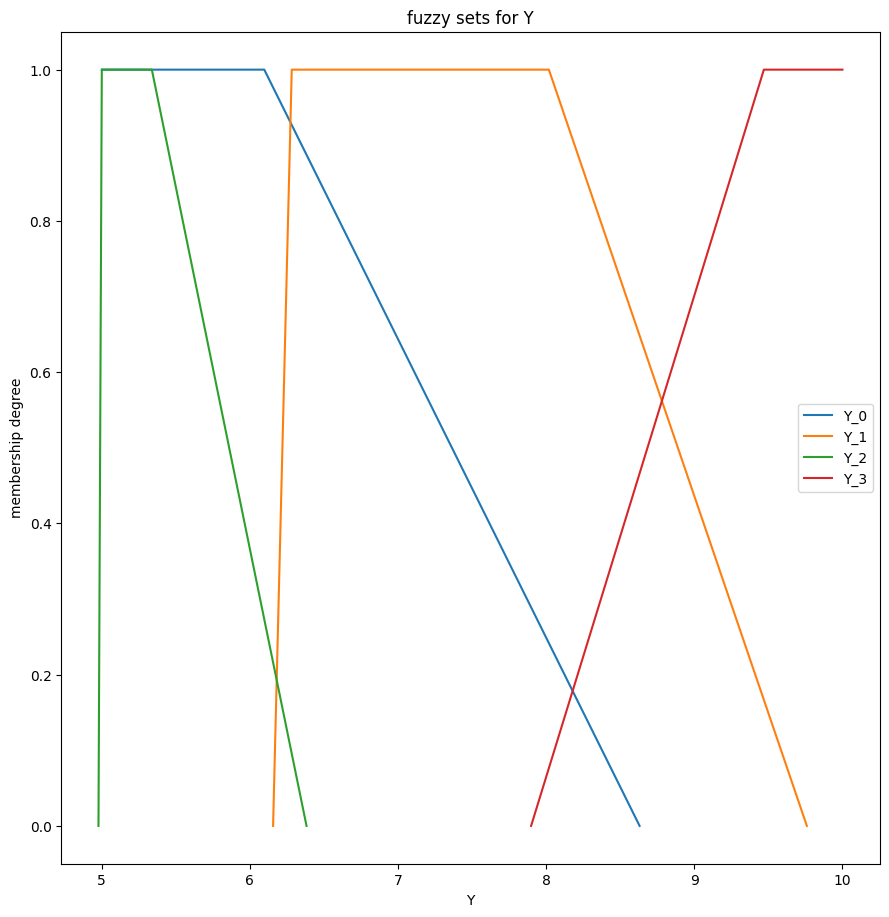

In [ ]:
first = training_model2.all_time_best_model.show_fuzzy_sets()